In [1]:
import sys
# Add parent directory to path to import file_paths module
sys.path.insert(0, '..')
import file_paths
import helper_functions

import eelbrain
from matplotlib import pyplot


In [2]:
# Configure the matplotlib figure style
FONT = 'Arial'
FONT_SIZE = 8
RC = {
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.transparent': True,
    # Font
    'font.family': 'sans-serif',
    'font.sans-serif': FONT,
    'font.size': FONT_SIZE,
    'figure.labelsize': FONT_SIZE,
    'figure.titlesize': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'axes.titlesize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,    
    'legend.fontsize': FONT_SIZE,
}
pyplot.rcParams.update(RC)

In [3]:
# Load TRFs for attended padded vs attended unpadded for all subjects
trfs = []
r_values = []

SUBJECTS = helper_functions.get_subjects()

for subject in SUBJECTS:
    attended_trf_path = file_paths.TRF_DIR / subject / f'{subject}_attended_trf.pickle'
    padded_attended_trf_path = file_paths.TRF_DIR / subject / f'{subject}_padded_attended_trf.pickle'

    if attended_trf_path.exists() and padded_attended_trf_path.exists():
        trf_attended = eelbrain.load.unpickle(attended_trf_path)
        trf_padded_attended = eelbrain.load.unpickle(padded_attended_trf_path)
        trfs.append((trf_attended, trf_padded_attended))
        r_values.append((trf_attended.r, trf_padded_attended.r))

        print(f"Loaded TRFs for {subject}")
    else:
        print(f"TRF files for {subject} not found, skipping.")
        

print(f"Loaded TRFs for {len(trfs)} subjects")

Loaded TRFs for S1
Loaded TRFs for S2
Loaded TRFs for S3
Loaded TRFs for S4
Loaded TRFs for S5
Loaded TRFs for S6
Loaded TRFs for S7
Loaded TRFs for S8
Loaded TRFs for S9
Loaded TRFs for S10
Loaded TRFs for S11
Loaded TRFs for S12
Loaded TRFs for S13
Loaded TRFs for S14
Loaded TRFs for S15
Loaded TRFs for S16
Loaded TRFs for S17
Loaded TRFs for S18
Loaded TRFs for 18 subjects


# Compare attended padded and attended unpadded TRFs

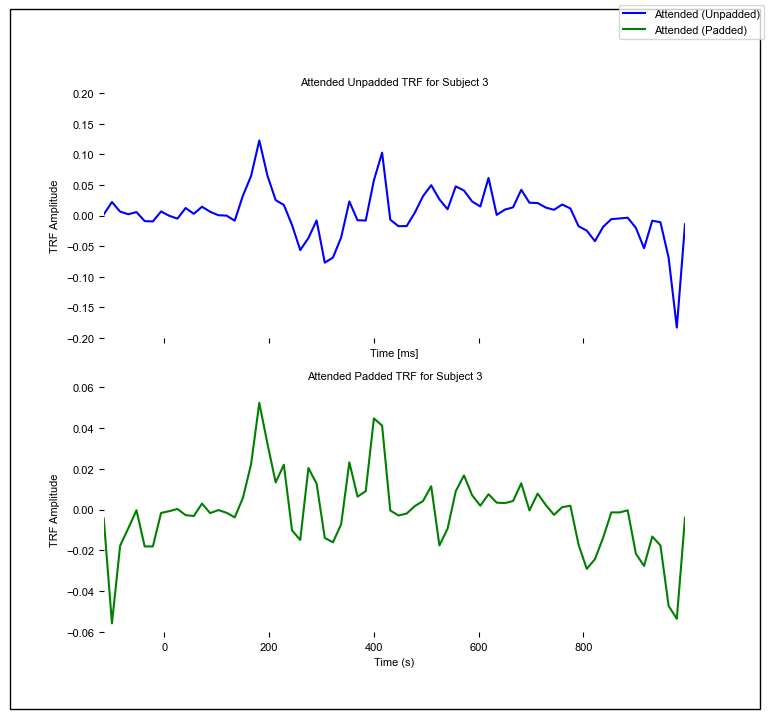

In [4]:
SUBJECT_NUMBER = 3

attended_trf_mean = trfs[SUBJECT_NUMBER - 1][0].h_scaled.mean('sensor')
padded_attended_trf_mean = trfs[SUBJECT_NUMBER - 1][1].h_scaled.mean('sensor')

# plot the TRFs together in one plot for the first subject with pyplot
# Setup the figure layout
fig, axes = pyplot.subplots(2, figsize=(7.5, 7), sharex=True, subplot_kw=dict(frame_on=False))
eelbrain.plot.UTS(attended_trf_mean, axes=axes[0], color='blue')
eelbrain.plot.UTS(padded_attended_trf_mean, axes=axes[1], color='green')

fig.legend(['Attended (Unpadded)', 'Attended (Padded)'], loc='upper right')
axes[0].set_title(f'Attended Unpadded TRF for Subject {SUBJECT_NUMBER}')
axes[1].set_title(f'Attended Padded TRF for Subject {SUBJECT_NUMBER}')
axes[0].set_ylabel('TRF Amplitude')
axes[1].set_ylabel('TRF Amplitude')
axes[1].set_xlabel('Time (s)')


eelbrain.plot.figure_outline()

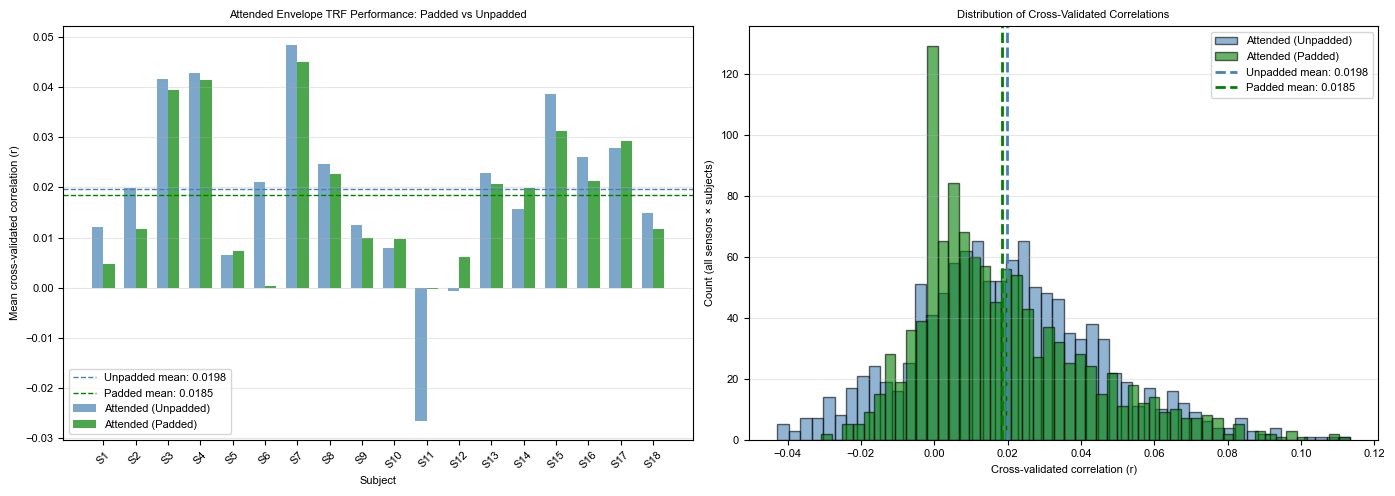

In [5]:
# Summary statistics across subjects
import numpy as np

mean_attended_r_per_subject = [r_att.mean() for (r_att, _) in r_values]
mean_padded_attended_r_per_subject = [r_padded.mean() for (_, r_padded) in r_values]


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 5))

# Bar plot of mean correlation per subject - both unpadded and padded
x = np.arange(len(mean_attended_r_per_subject))
width = 0.35  # Bar width

# Unpadded bars
bars1 = ax1.bar(x - width/2, mean_attended_r_per_subject, width, 
                color='steelblue', alpha=0.7, label='Attended (Unpadded)')
# Padded bars
bars2 = ax1.bar(x + width/2, mean_padded_attended_r_per_subject, width,
                color='green', alpha=0.7, label='Attended (Padded)')

# Grand means
ax1.axhline(np.mean(mean_attended_r_per_subject), color='steelblue', 
            linestyle='--', linewidth=1, 
            label=f'Unpadded mean: {np.mean(mean_attended_r_per_subject):.4f}')
ax1.axhline(np.mean(mean_padded_attended_r_per_subject), color='green', 
            linestyle='--', linewidth=1,
            label=f'Padded mean: {np.mean(mean_padded_attended_r_per_subject):.4f}')

ax1.set_xlabel('Subject')
ax1.set_ylabel('Mean cross-validated correlation (r)')
ax1.set_title('Attended Envelope TRF Performance: Padded vs Unpadded')
ax1.set_xticks(x)
ax1.set_xticklabels([f'S{i+1}' for i in range(len(mean_attended_r_per_subject))], rotation=45)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Histogram of correlation values - both unpadded and padded
all_r_attended = np.concatenate([r.x.flatten() for (r, _) in r_values])
all_r_padded_attended = np.concatenate([r.x.flatten() for (_, r) in r_values])

ax2.hist(all_r_attended, bins=50, color='steelblue', alpha=0.6, 
         edgecolor='black', label='Attended (Unpadded)')
ax2.hist(all_r_padded_attended, bins=50, color='green', alpha=0.6, 
         edgecolor='black', label='Attended (Padded)')

ax2.axvline(all_r_attended.mean(), color='steelblue', linestyle='--', linewidth=2,
            label=f'Unpadded mean: {all_r_attended.mean():.4f}')
ax2.axvline(all_r_padded_attended.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Padded mean: {all_r_padded_attended.mean():.4f}')

ax2.set_xlabel('Cross-validated correlation (r)')
ax2.set_ylabel('Count (all sensors × subjects)')
ax2.set_title('Distribution of Cross-Validated Correlations')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

pyplot.tight_layout()
pyplot.show()